Domain –Travel Aggregator Analysis

Scenario:

Travelling has significantly changed thanks to technology. In the earlier days, it was not easy to travel as booking journeys used to be a hassle, where people needed to contact travel agents, get prices and then do a lot of paperwork.

But, with the advent of online apps, it becomes easier to book tickets. However, one challenge is  still  there:  Due  to  many  available  apps  which  offer  bookings,  there  can  be  a  lot  of comparisons for getting the best price.

Business Requirement:

A new Indian start-up, "MyNextBooking” is an aggregator on top of theavailable top platforms (Yatra,  MMT,  Goibibo).  It  helps  the  user  compare  prices  for  their  upcoming  journeys  on  its platform and the customer is redirected to the desired platform after looking at the price.

However, they need to do a lot of analysis of the data which they have collected over a while.As a  newly hired analyst and proficiency in python, your role is to help them perform an in-depth analysis.

Objective: Please provide answers to the following questions

1.Find the number of distinct bookings, sessions, and searches from the given datasets.

In [29]:
import pandas as pd

# Step 2: Load Datasets
# Replace 'bookings.csv', 'sessions.csv', with your actual dataset filenames
bookings_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Bookings.csv')
sessions_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Sessions.csv')
#print(bookings_df)
#print(sessions_df)
# Step 3: Analyze Data
# Find the number of distinct bookings, sessions, and searches
num_distinct_bookings = len(bookings_df['booking_id'].unique())
num_distinct_sessions = len(sessions_df['session_id'].unique())


# Step 4: Display Results
print(f"Number of Distinct Bookings: {num_distinct_bookings}")
print(f"Number of Distinct Sessions: {num_distinct_sessions}")



Number of Distinct Bookings: 339
Number of Distinct Sessions: 331


2.How many sessions have more than one booking.

In [ ]:
import pandas as pd

# Load Datasets
bookings_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Bookings.csv')
sessions_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Sessions.csv')

# Step 1: Identify sessions with bookings
sessions_with_bookings = sessions_df[sessions_df['session_id'].isin(bookings_df['session_id'].dropna().unique())]

# Step 2: Group by session_id and count the number of bookings in each session
session_booking_counts = sessions_with_bookings.groupby('session_id')['booking_id'].count()

# Step 3: Filter sessions with more than one booking
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1]

# Step 4: Get the count of sessions with more than one booking
count_sessions_with_multiple_bookings = len(sessions_with_multiple_bookings)

# Step 5: Display the result
print("Number of sessions with more than one booking:", count_sessions_with_multiple_bookings)


3.Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week.

The day with the highest number of bookings is: Thursday


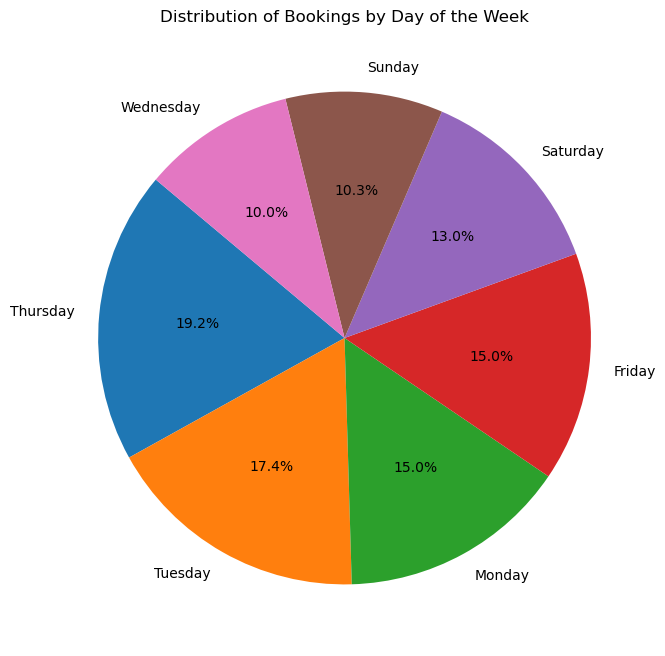

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Have a 'booking_date' column that contains the booking dates
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])

# Extract the day of the week from the booking dates
bookings_df['day_of_week'] = bookings_df['booking_time'].dt.day_name()

# Count the number of bookings for each day of the week
booking_counts_by_day = bookings_df['day_of_week'].value_counts()

# Display the day with the highest number of bookings
day_with_highest_bookings = booking_counts_by_day.idxmax()
print(f"The day with the highest number of bookings is: {day_with_highest_bookings}")

# Plot a pie chart to show the distribution
plt.figure(figsize=(8, 8))
plt.pie(booking_counts_by_day, labels=booking_counts_by_day.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bookings by Day of the Week')
plt.show()


4.For each of the service names,display the total number of bookings and the total Gross Booking Value in INR

In [9]:
import pandas as pd

# Load Datasets
bookings_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Bookings.csv')

# Group by service name and calculate total number of bookings and total GBV
service_stats = bookings_df.groupby('service_name').agg({
    'booking_id': 'count',               # Total number of bookings
    'INR_Amount': 'sum'                  # Total Gross Booking Value (GBV) in INR
}).reset_index()

# Rename columns for clarity
service_stats.columns = ['Service Name', 'Total Bookings', 'Total GBV (INR)']

# Display the results
print(service_stats)


  Service Name  Total Bookings  Total GBV (INR)
0      GOIBIBO             186       5897637.97
1          MMT              48        665669.08
2        YATRA             105       3378702.13


5.For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [10]:
import pandas as pd

# Load Datasets
bookings_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Bookings.csv')

# Filter customers with more than one booking
customers_with_multiple_bookings = bookings_df['customer_id'].value_counts()
customers_with_multiple_bookings = customers_with_multiple_bookings[customers_with_multiple_bookings > 1].index

# Filter bookings for customers with more than one booking
multiple_bookings_df = bookings_df[bookings_df['customer_id'].isin(customers_with_multiple_bookings)]

# Group by route and calculate the number of bookings for each route
route_stats = multiple_bookings_df.groupby(['from_city', 'to_city']).size().reset_index(name='num_bookings')

# Find the route with the highest number of bookings
most_booked_route = route_stats.loc[route_stats['num_bookings'].idxmax()]

# Display the result
print("Most booked route for customers with more than one booking:")
print(f"From {most_booked_route['from_city']} to {most_booked_route['to_city']} with {most_booked_route['num_bookings']} bookings.")


Most booked route for customers with more than one booking:
From Gurgaon to Roissy-en-France with 5 bookings.


6.Which are the top 3 departure cities from where customers book mostly in advance,provided that there have been at least 5 departures from that city?

In [11]:
import pandas as pd

# Load Datasets
bookings_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Bookings.csv')

# Assuming you have a 'days_to_departure' column indicating the number of days to departure
# Convert 'days_to_departure' to numeric
bookings_df['days_to_departure'] = pd.to_numeric(bookings_df['days_to_departure'], errors='coerce')

# Filter cities with at least 5 departures
valid_departure_cities = bookings_df['from_city'].value_counts()[bookings_df['from_city'].value_counts() >= 5].index
filtered_departures = bookings_df[bookings_df['from_city'].isin(valid_departure_cities)]

# Group by departure city and calculate the average days to departure
average_days_to_departure = filtered_departures.groupby('from_city')['days_to_departure'].mean()

# Sort the cities based on average days to departure in ascending order
sorted_cities = average_days_to_departure.sort_values()

# Select the top 3 cities
top_3_cities = sorted_cities.head(3)

# Display the result
print("Top 3 departure cities with the most bookings in advance:")
for city, avg_days in top_3_cities.items():
    print(f"{city}: Average days to departure = {avg_days:.2f} days")


Top 3 departure cities with the most bookings in advance:
Rāja Sānsi: Average days to departure = 8.82 days
Ahmedabad: Average days to departure = 11.75 days
Delhi: Average days to departure = 12.76 days


7.Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

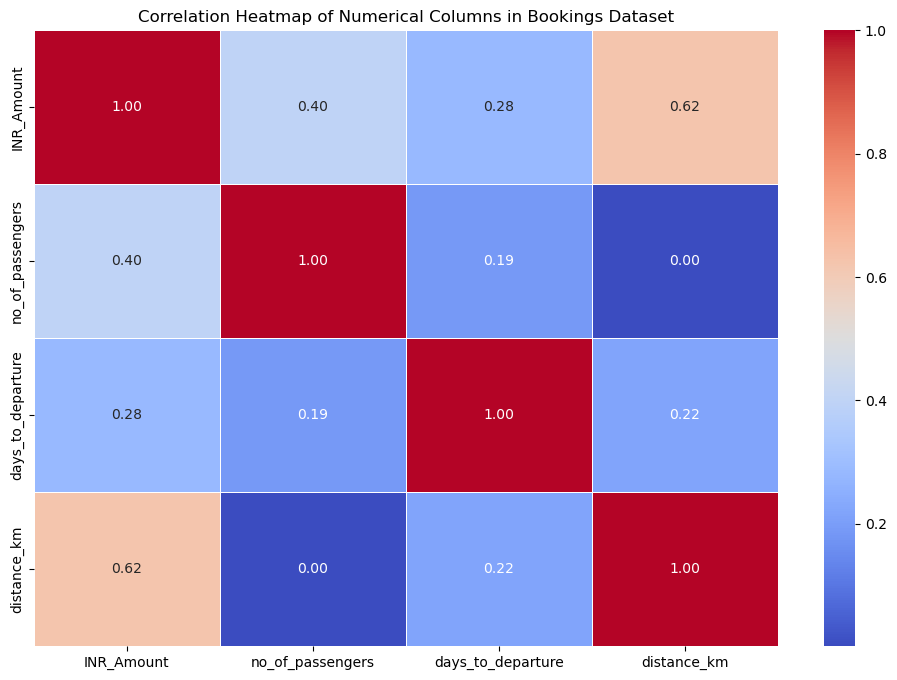

The pair of numerical columns with the maximum correlation is ['INR_Amount', 'INR_Amount'] with a correlation value of 1.00.


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Datasets
bookings_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Bookings.csv')

# Assuming you want to include only numerical columns in the correlation matrix
numerical_columns = bookings_df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns in Bookings Dataset')
plt.show()

# Find the pair of numerical columns with the maximum correlation
max_corr_pair = correlation_matrix.abs().stack().idxmax()
max_corr_columns = [max_corr_pair[0], max_corr_pair[1]]
max_corr_value = correlation_matrix.loc[max_corr_pair]

print(f"The pair of numerical columns with the maximum correlation is {max_corr_columns} with a correlation value of {max_corr_value:.2f}.")


8.For each service, which is the most used device type for making bookings on the platform?

In [13]:
import pandas as pd

# Load Datasets
bookings_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Bookings.csv')

# Group by service and device type, then calculate the count of bookings for each combination
device_usage_by_service = bookings_df.groupby(['service_name', 'device_type_used']).size().reset_index(name='booking_count')

# Find the most used device type for each service
most_used_device_by_service = device_usage_by_service.groupby('service_name').apply(lambda x: x.loc[x['booking_count'].idxmax()])

# Display the result
print("Most used device type for making bookings on the platform for each service:")
print(most_used_device_by_service[['service_name', 'device_type_used', 'booking_count']])


Most used device type for making bookings on the platform for each service:
             service_name device_type_used  booking_count
service_name                                             
GOIBIBO           GOIBIBO              IOS             70
MMT                   MMT          Desktop             30
YATRA               YATRA          Desktop             51


9.Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

/var/folders/xd/j94637p953s5wh10jyypd0j00000gn/T/ipykernel_32121/2102252617.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings_df['year_quarter'] = bookings_df['booking_time'].dt.to_period("Q")


<Figure size 1200x800 with 0 Axes>

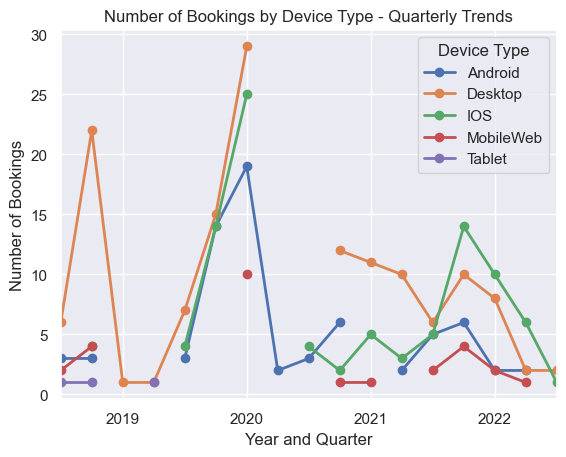

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets
bookings_df = pd.read_csv('/Users/aksavxavier/Desktop/Datasets/Bookings.csv')

# Assuming you have a 'booking_time' column that contains the booking timestamps
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])

# Extract year and quarter from booking timestamp
bookings_df['year_quarter'] = bookings_df['booking_time'].dt.to_period("Q")

# Plot trends for each device type
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")

# Group by year, quarter, and device type, then count the number of bookings
device_trends = bookings_df.groupby(['year_quarter', 'device_type_used']).size().unstack()

# Plot the trends
device_trends.plot(kind='line', marker='o', linewidth=2)
plt.title('Number of Bookings by Device Type - Quarterly Trends')
plt.xlabel('Year and Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.show()
